In [1]:
# name = input("Wie ist dein Name? ")

In [2]:
# print("Hello", name)

In [3]:
# myNum = 2
# print(type(myNum))

In [4]:
# myStr = "String"
# print("Teststring" + str(myNum))

In [5]:
"""
myList = [1, 2, 3]
myList.append(4)
myList.insert(0, 0)
myElement =myList.pop(2)
print(myList)
print(myElement)
"""

'\nmyList = [1, 2, 3]\nmyList.append(4)\nmyList.insert(0, 0)\nmyElement =myList.pop(2)\nprint(myList)\nprint(myElement)\n'

In [6]:
"""
myList = ["0", 1, 2, 3]
for i in myList:
    myResult = int(i) * 3
    if myResult % 2 == 0:
        print(myResult)
"""

'\nmyList = ["0", 1, 2, 3]\nfor i in myList:\n    myResult = int(i) * 3\n    if myResult % 2 == 0:\n        print(myResult)\n'

In [7]:
"""
myList = ["Mein", "Name", "ist", "Niklas"]
for k, v in enumerate(myList):
    print(k, v)
"""

'\nmyList = ["Mein", "Name", "ist", "Niklas"]\nfor k, v in enumerate(myList):\n    print(k, v)\n'

In [8]:
"""
amount = int(input("Wie viel muss bezahlt werden? "))
coins = [200, 100, 50, 20, 10, 5, 2, 1]
denominations = []

for k, v in enumerate(coins):
    remainder = amount % v
    amount = amount - remainder
    denominations.append(int(amount / v))
    amount = remainder
    
#print(denominations)
print(f"\nEs muss wie folgt zahlen:")
print(f"{denominations[0]} x 2 Euro")
print(f"{denominations[1]} x 1 Euro")
print(f"{denominations[2]} x 50 Cent")
print(f"{denominations[3]} x 20 Cent")
print(f"{denominations[4]} x 10 Cent")
print(f"{denominations[5]} x 5 Cent")
print(f"{denominations[6]} x 2 Euro")
print(f"{denominations[7]} x 1 Cent")
"""
    

'\namount = int(input("Wie viel muss bezahlt werden? "))\ncoins = [200, 100, 50, 20, 10, 5, 2, 1]\ndenominations = []\n\nfor k, v in enumerate(coins):\n    remainder = amount % v\n    amount = amount - remainder\n    denominations.append(int(amount / v))\n    amount = remainder\n    \n#print(denominations)\nprint(f"\nEs muss wie folgt zahlen:")\nprint(f"{denominations[0]} x 2 Euro")\nprint(f"{denominations[1]} x 1 Euro")\nprint(f"{denominations[2]} x 50 Cent")\nprint(f"{denominations[3]} x 20 Cent")\nprint(f"{denominations[4]} x 10 Cent")\nprint(f"{denominations[5]} x 5 Cent")\nprint(f"{denominations[6]} x 2 Euro")\nprint(f"{denominations[7]} x 1 Cent")\n'

In [9]:
import pandas as pd
df = pd.read_csv("C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdTag_12_05_2021.csv", sep = ";")
df.head(n=10)

,Produktvariante,Prozessschritt,Auftragsnummer,Prozessbeschreibung,Prozessnummer,Startdatum,Startzeit,Enddatum,Endzeit,Arbeitsstation,Transportzeit
0,8010,10,1329,release a defined part on stopper 1,212,12.05.2021,10:02:25,12.05.2021,10:02:40,5,0
1,8010,20,1329,feed part from magazin,200,12.05.2021,10:03:07,12.05.2021,10:03:09,11,27
2,8010,30,1329,assemble a PCB with one fuse left,302,12.05.2021,10:04:45,12.05.2021,10:06:28,8,6
3,8010,40,1329,feed part from magazin,200,12.05.2021,10:07:27,12.05.2021,10:07:30,6,63
4,8010,50,1329,pressing for time in seconds,110,12.05.2021,10:07:43,12.05.2021,10:07:45,7,14
5,8010,60,1329,store a part from stopper 2,211,12.05.2021,10:09:49,12.05.2021,10:10:01,5,1126
6,8010,10,1329,release a defined part on stopper 1,212,12.05.2021,10:02:43,12.05.2021,10:02:56,5,0
7,8010,20,1329,feed part from magazin,200,12.05.2021,10:03:23,12.05.2021,10:03:25,11,27
8,8010,30,1329,assemble a PCB with one fuse left,302,12.05.2021,10:06:35,12.05.2021,10:08:18,8,6
9,8010,40,1329,feed part from magazin,200,12.05.2021,10:09:28,12.05.2021,10:09:30,6,63


In [5]:
import pandas as pd

df = pd.read_csv(
    'C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_NoNan_ID.csv', sep=';')

df = df.reset_index()  # make sure indexes pair with number of rows


idList = [1]

werkstueckID = 1

counter = 1  # zählt die der werkstueckID bisher zugerordneten Zeilen. Wechselt die ID bevor der Counter bei 6 ist, wird für die Zeile 'error' eingetragen

errorCounter = 0

for index, row in df.iterrows():

    if index == 0:

        # falls es sich um die erste Zeile handelt, Inhalte speichern und mit nächster Iteration fortfahren
        lastRowList = [row['Produktvariante'], row['Prozessschritt'], row['Auftragsnummer'], row['Prozessbeschreibung'],
                       row['Prozessnummer'], row['Startdatum'], row['Startzeit'], row['Enddatum'], row['Endzeit'], row['Arbeitsstation'], row['Transportzeit']]
        continue

    if (row['Produktvariante'] == lastRowList[0]) & (row['Prozessschritt'] == lastRowList[1] + 10) & (row['Auftragsnummer'] == lastRowList[2]):

        idList.append(werkstueckID)
        counter += 1

    else:
        if counter < 6:
            for x in range(counter):
                idList[len(idList)-1 - x] = 'error'
                errorCounter+= 1

            # idList.append('error')

        werkstueckID += 1
        idList.append(werkstueckID)
        counter = 1

    lastRowList = [row['Produktvariante'], row['Prozessschritt'], row['Auftragsnummer'], row['Prozessbeschreibung'],
                   row['Prozessnummer'], row['Startdatum'], row['Startzeit'], row['Enddatum'], row['Endzeit'], row['Arbeitsstation'], row['Transportzeit']]

# print(idList)
# print(lastRowList[1])

# print(idList[100])

# Liste mit IDs und error hinzufügen
df['werkstueckID'] = idList

errorIndexList = []
errorPostion = 2

#print("errorCounter hat gezaehlt " + str(errorCounter))

for index, row in df.iterrows():
        if row['werkstueckID'] == 'error':
            errorIndexList.append(errorPostion)
        errorPostion += 1
    

#print(df.loc[df['werkstueckID'] == 'error'].info())

df.loc[df['werkstueckID'] == 'error']

#dfError = df[df['werkstueckID'] == 'error']

#dfError.to_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/errorList.csv', sep=';')

#df.to_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdError.csv', sep=';')

#df.to_csv('/Users/JensRosenkranz/Downloads/errorList.csv', sep=';')

#dfError

#print(errorIndexList)
#print(len(errorIndexList))

#df.loc[min('Startzeit')]


#########################

# remove datapoints with error
dfCorrect = df[df['werkstueckID'] != 'error']
dfCorrect = dfCorrect.copy(deep=True)

# convert to datetime
dfCorrect['Startzeit'] = pd.to_datetime(dfCorrect['Startzeit'])
dfCorrect['Endzeit'] = pd.to_datetime(dfCorrect['Endzeit'])

# Berechnung der Bearbeitungszeit
dfCorrect['Bearbeitungszeit_s'] = dfCorrect['Endzeit'] - dfCorrect['Startzeit']


transportzeit = []

# Berechnung der Transportzeit
for index, row in dfCorrect.iterrows():
    
    #if index == 0:
        # falls es sich um die erste Zeile handelt, Inhalte speichern und mit nächster Iteration fortfahren
        #lastRowEndzeit = row['Endzeit']
        
    if row['Prozessschritt'] == 10:
        transportzeit.append(row['Startzeit'] - row['Startzeit'])
    else:
        zeit = row['Startzeit'] - lastRowEndzeit
            
        transportzeit.append(zeit)
        
    lastRowEndzeit = row['Endzeit']

dfCorrect['Transportzeit_s'] = transportzeit


# Berechnung der Durchlaufzeit
zeit = zeit - zeit
durchlaufzeit = []

for index, row in dfCorrect.iterrows():
    zeit = zeit + dfCorrect.at[index,'Bearbeitungszeit_s'] + dfCorrect.at[index,'Transportzeit_s']
    if row['Prozessschritt'] == 60:
        durchlaufzeit.append(zeit)
        zeit = row['Startzeit'] - row['Startzeit']
    else:
        durchlaufzeit.append(row['Startzeit'] - row['Startzeit'])
        
dfCorrect['Durchlaufzeit_s'] = durchlaufzeit



df_8010_40 = dfCorrect[(dfCorrect['Produktvariante'] == 8010) & (dfCorrect['Prozessschritt'] == 40)]
var_8010_40 = df_8010_40['Bearbeitungszeit_s'].median()

df_8010_50 = dfCorrect[(dfCorrect['Produktvariante'] == 8010) & (dfCorrect['Prozessschritt'] == 50)]
var_8010_50 = df_8010_50['Bearbeitungszeit_s'].median()

df_8010_60 = dfCorrect[(dfCorrect['Produktvariante'] == 8010) & (dfCorrect['Prozessschritt'] == 60)]
var_8010_60 = df_8010_60['Bearbeitungszeit_s'].median()

df_8011_40 = dfCorrect[(dfCorrect['Produktvariante'] == 8011) & (dfCorrect['Prozessschritt'] == 40)]
var_8011_40 = df_8011_40['Bearbeitungszeit_s'].median()

df_8011_50 = dfCorrect[(dfCorrect['Produktvariante'] == 8011) & (dfCorrect['Prozessschritt'] == 50)]
var_8011_50 = df_8011_50['Bearbeitungszeit_s'].median()

df_8011_60 = dfCorrect[(dfCorrect['Produktvariante'] == 8011) & (dfCorrect['Prozessschritt'] == 60)]
var_8011_60 = df_8011_60['Bearbeitungszeit_s'].median()

print(f'Median Bearbeitungszeit 8010 40: {var_8010_40}')
print(f'Median Bearbeitungszeit 8010 50: {var_8010_50}')
print(f'Median Bearbeitungszeit 8010 60: {var_8010_60}')
print(f'Median Bearbeitungszeit 8011 40: {var_8011_40}')
print(f'Median Bearbeitungszeit 8011 50: {var_8011_50}')
print(f'Median Bearbeitungszeit 8011 60: {var_8011_60}')


df_8010_40 = dfCorrect[(dfCorrect['Produktvariante'] == 8010) & (dfCorrect['Prozessschritt'] == 40)]
var_8010_40 = df_8010_40['Transportzeit_s'].median()

df_8010_50 = dfCorrect[(dfCorrect['Produktvariante'] == 8010) & (dfCorrect['Prozessschritt'] == 50)]
var_8010_50 = df_8010_50['Transportzeit_s'].median()

df_8010_60 = dfCorrect[(dfCorrect['Produktvariante'] == 8010) & (dfCorrect['Prozessschritt'] == 60)]
var_8010_60 = df_8010_60['Transportzeit_s'].median()

df_8011_40 = dfCorrect[(dfCorrect['Produktvariante'] == 8011) & (dfCorrect['Prozessschritt'] == 40)]
var_8011_40 = df_8011_40['Transportzeit_s'].median()

df_8011_50 = dfCorrect[(dfCorrect['Produktvariante'] == 8011) & (dfCorrect['Prozessschritt'] == 50)]
var_8011_50 = df_8011_50['Transportzeit_s'].median()

df_8011_60 = dfCorrect[(dfCorrect['Produktvariante'] == 8011) & (dfCorrect['Prozessschritt'] == 60)]
var_8011_60 = df_8011_60['Transportzeit_s'].median()

print(f'Median Transportzeit 8010 40: {var_8010_40}')
print(f'Median Transportzeit 8010 50: {var_8010_50}')
print(f'Median Transportzeit 8010 60: {var_8010_60}')
print(f'Median Transportzeit 8011 40: {var_8011_40}')
print(f'Median Transportzeit 8011 50: {var_8011_50}')
print(f'Median Transportzeit 8011 60: {var_8011_60}')


dfCorrect[dfCorrect['Startzeit'].isna()]





Median Bearbeitungszeit 8010 40: 0 days 00:00:02
Median Bearbeitungszeit 8010 50: 0 days 00:00:02
Median Bearbeitungszeit 8010 60: 0 days 00:00:12
Median Bearbeitungszeit 8011 40: 0 days 00:00:02
Median Bearbeitungszeit 8011 50: 0 days 00:00:02
Median Bearbeitungszeit 8011 60: 0 days 00:00:12
Median Transportzeit 8010 40: 0 days 00:00:52
Median Transportzeit 8010 50: 0 days 00:00:16
Median Transportzeit 8010 60: 0 days 00:01:40
Median Transportzeit 8011 40: 0 days 00:00:53
Median Transportzeit 8011 50: 0 days 00:00:15
Median Transportzeit 8011 60: 0 days 00:01:44


,index,Produktvariante,Prozessschritt,Auftragsnummer,Prozessbeschreibung,Prozessnummer,Startdatum,Startzeit,Enddatum,Endzeit,Arbeitsstation,Transportzeit,werkstueckID,Bearbeitungszeit_s,Transportzeit_s,Durchlaufzeit_s
1095,1095,8010,40,1360,feed part from magazin,200,NaN,NaT,NaN,NaT,6,63,201,NaT,NaT,NaT
1096,1096,8010,50,1360,pressing for time in seconds,110,NaN,NaT,NaN,NaT,7,14,201,NaT,NaT,NaT
1097,1097,8010,60,1360,store a part from stopper 2,211,NaN,NaT,NaN,NaT,5,1126,201,NaT,NaT,NaT
1113,1113,8111,40,1360,feed part from magazin,200,NaN,NaT,NaN,NaT,6,63,204,NaT,NaT,NaT
1114,1114,8111,50,1360,pressing for time in seconds,110,NaN,NaT,NaN,NaT,7,14,204,NaT,NaT,NaT
1115,1115,8111,60,1360,store a part from stopper 2,211,NaN,NaT,NaN,NaT,5,1126,204,NaT,NaT,NaT
1145,1145,8011,60,1361,store a part from stopper 2,211,NaN,NaT,NaN,NaT,5,1126,209,NaT,NaT,NaT


In [25]:
import pandas as pd

df = pd.read_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_final_Zeiten_10-25-15.csv', sep=';')

#df = df.reset_index()  # make sure indexes pair with number of rows


# convert to datetime
df['Start'] = pd.to_datetime(df['Startzeit'])
df['Ende']= pd.to_datetime(df['Endzeit'])

# Berechnung der Bearbeitungszeit
df['Bearbeitungszeit_s'] = df['Ende'] - df['Start']


transportzeit = []

# Berechnung der Transportzeit
for index, row in df.iterrows():
        
    if row['Prozessschritt'] == 10:
        transportzeit.append(row['Start'] - row['Start'])
    else:
        zeit = row['Start'] - lastRowEndzeit
            
        transportzeit.append(zeit)
        
    lastRowEndzeit = row['Ende']

df['Transportzeit_s'] = transportzeit


# Berechnung der Durchlaufzeit
zeit = zeit - zeit
durchlaufzeit = []

for index, row in df.iterrows():
    zeit = zeit + df.at[index,'Bearbeitungszeit_s'] + df.at[index,'Transportzeit_s']
    if row['Prozessschritt'] == 60:
        durchlaufzeit.append(zeit)
        zeit = row['Start'] - row['Start']
    else:
        durchlaufzeit.append(row['Start'] - row['Start'])
        
df['Durchlaufzeit_s'] = durchlaufzeit


'''
df_8010_30 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 30)]
var_8010_30 = df_8010_30['Bearbeitungszeit_s'].median()

df_8010_40 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 40)]
var_8010_40 = df_8010_40['Bearbeitungszeit_s'].median()

df_8010_50 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 50)]
var_8010_50 = df_8010_50['Bearbeitungszeit_s'].median()

df_8010_60 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 60)]
var_8010_60 = df_8010_60['Bearbeitungszeit_s'].median()

df_8011_40 = df[(df['Produktvariante'] == 8011) & (df['Prozessschritt'] == 40)]
var_8011_40 = df_8011_40['Bearbeitungszeit_s'].median()

df_8011_50 = df[(df['Produktvariante'] == 8011) & (df['Prozessschritt'] == 50)]
var_8011_50 = df_8011_50['Bearbeitungszeit_s'].median()

df_8011_60 = df[(df['Produktvariante'] == 8011) & (df['Prozessschritt'] == 60)]
var_8011_60 = df_8011_60['Bearbeitungszeit_s'].median()

print(f'Median Bearbeitungszeit 8010 30: {var_8010_30}')
print(f'Median Bearbeitungszeit 8010 40: {var_8010_40}')
print(f'Median Bearbeitungszeit 8010 50: {var_8010_50}')
print(f'Median Bearbeitungszeit 8010 60: {var_8010_60}')
print(f'Median Bearbeitungszeit 8011 40: {var_8011_40}')
print(f'Median Bearbeitungszeit 8011 50: {var_8011_50}')
print(f'Median Bearbeitungszeit 8011 60: {var_8011_60}')


df_8010_30 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 30)]
var_8010_30 = df_8010_30['Transportzeit_s'].median()

df_8010_40 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 40)]
var_8010_40 = df_8010_40['Transportzeit_s'].median()

df_8010_50 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 50)]
var_8010_50 = df_8010_50['Transportzeit_s'].median()

df_8010_60 = df[(df['Produktvariante'] == 8010) & (df['Prozessschritt'] == 60)]
var_8010_60 = df_8010_60['Transportzeit_s'].median()

df_8011_40 = df[(df['Produktvariante'] == 8011) & (df['Prozessschritt'] == 40)]
var_8011_40 = df_8011_40['Transportzeit_s'].median()

df_8011_50 = df[(df['Produktvariante'] == 8011) & (df['Prozessschritt'] == 50)]
var_8011_50 = df_8011_50['Transportzeit_s'].median()

df_8011_60 = df[(df['Produktvariante'] == 8011) & (df['Prozessschritt'] == 60)]
var_8011_60 = df_8011_60['Transportzeit_s'].median()

print(f'Median Transportzeit 8010 30: {var_8010_30}')
print(f'Median Transportzeit 8010 40: {var_8010_40}')
print(f'Median Transportzeit 8010 50: {var_8010_50}')
print(f'Median Transportzeit 8010 60: {var_8010_60}')
print(f'Median Transportzeit 8011 40: {var_8011_40}')
print(f'Median Transportzeit 8011 50: {var_8011_50}')
print(f'Median Transportzeit 8011 60: {var_8011_60}')
'''


# convert timedelta to float
df['Bearbeitungszeit_s'] = df['Bearbeitungszeit_s'].dt.total_seconds()
df['Transportzeit_s'] = df['Transportzeit_s'].dt.total_seconds()
df['Durchlaufzeit_s'] = df['Durchlaufzeit_s'].dt.total_seconds()

#current time for filename
from datetime import datetime
now = datetime.now()
now = now.strftime("%H-%M-%S")


df_describe = df.groupby(['Prozessschritt', 'Produktvariante'])['Transportzeit_s', 'Bearbeitungszeit_s', 'Durchlaufzeit_s'].describe()
#df_describe = df_describe['Transportzeit_s']
#df_describe = df_describe['Bearbeitungszeit_s']
df_describe = df_describe['Durchlaufzeit_s']






#df.to_csv(f'C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_final_Zeiten_{now}.csv', sep=';')
df_describe
#print("Done")

C:\Users\Workshop\AppData\Local\Temp\ipykernel_7300\336411177.py:121: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_describe = df.groupby(['Prozessschritt', 'Produktvariante'])['Transportzeit_s', 'Bearbeitungszeit_s', 'Durchlaufzeit_s'].describe()


count        mean         std    min    25%  \
Prozessschritt Produktvariante                                                
10             8010              59.0    0.000000    0.000000    0.0    0.0   
               8011              57.0    0.000000    0.000000    0.0    0.0   
               8110              47.0    0.000000    0.000000    0.0    0.0   
               8111              56.0    0.000000    0.000000    0.0    0.0   
20             8010              59.0    0.000000    0.000000    0.0    0.0   
               8011              57.0    0.000000    0.000000    0.0    0.0   
               8110              47.0    0.000000    0.000000    0.0    0.0   
               8111              56.0    0.000000    0.000000    0.0    0.0   
30             8010              59.0    0.000000    0.000000    0.0    0.0   
               8011              57.0    0.000000    0.000000    0.0    0.0   
               8110              47.0    0.000000    0.000000    0.0    0.0   
               8111              56.0    0.000000    0.000000    0.0    0.0   
40             8010              59.0    0.000000    0.000000    0.0    0.0   
               8011              57.0    0.000000    0.000000    0.0    0.0   
               8110              47.0    0.000000    0.000000    0.0    0.0   
               8111              56.0    0.000000    0.000000    0.0    0.0   
50             8010              59.0    0.000000    0.000000    0.0    0.0   
               8011              57.0    0.000000    0.000000    0.0    0.0   
               8110              47.0    0.000000    0.000000    0.0    0.0   
               8111              56.0    0.000000    0.000000    0.0    0.0   
60             8010              59.0  876.881356  320.285545  420.0  600.0   
               8011              57.0  949.175439  282.407388  532.0  701.0   
               8110              47.0  973.063830  197.220402  495.0  873.5   
               8111              56.0  886.535714  228.423766  435.0  744.0   

                                  50%     75%     max  
Prozessschritt Produktvariante                         
10             8010               0.0     0.0     0.0  
               8011               0.0     0.0     0.0  
               8110               0.0     0.0     0.0  
               8111               0.0     0.0     0.0  
20             8010               0.0     0.0     0.0  
               8011               0.0     0.0     0.0  
               8110               0.0     0.0     0.0  
               8111               0.0     0.0     0.0  
30             8010               0.0     0.0     0.0  
               8011               0.0     0.0     0.0  
               8110               0.0     0.0     0.0  
               8111               0.0     0.0     0.0  
40             8010               0.0     0.0     0.0  
               8011               0.0     0.0     0.0  
               8110               0.0     0.0     0.0  
               8111               0.0     0.0     0.0  
50             8010               0.0     0.0     0.0  
               8011               0.0     0.0     0.0  
               8110               0.0     0.0     0.0  
               8111               0.0     0.0     0.0  
60             8010             819.0  1135.0  1809.0  
               8011             934.0  1098.0  1572.0  
               8110             985.0  1102.5  1322.0  
               8111             883.0   996.0  1622.0

In [35]:
import pandas as pd

df = pd.read_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_NoNan_ID_Zeiten.csv', sep=';')
dfSelect = df[['Prozessschritt', 'Produktvariante', 'Transportzeit_s']]
dfSelect = dfSelect[dfSelect['Prozessschritt'] == 50]
dfA = dfSelect.groupby(['Prozessschritt', 'Produktvariante', 'Transportzeit_s']).count()
#dfA

dfSelect2 = df[['Prozessschritt', 'Start', 'Ende', 'Bearbeitungszeit_s']]
dfSelect2.loc[(df['Prozessschritt'] == 40) & (df['Bearbeitungszeit_s'] == 594 )]
#df.loc[(df['werkstueckID'] == 181)]

,Prozessschritt,Start,Ende,Bearbeitungszeit_s
1083,40,2021-12-05 19:26:39,2021-12-05 19:36:33,594.0


Text(0, 0.5, 'Mittelwert der Durchlaufzeit')

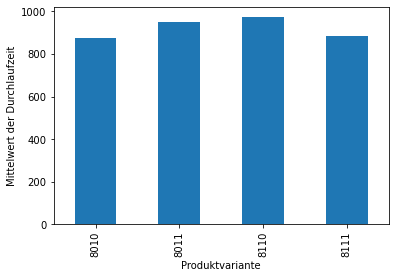

In [36]:
import pandas as pd

df = pd.read_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_final_Zeiten_10-25-15.csv', sep=';')

# Mittelwert der Durchlaufzeiten nach Produktvarianten
dfDurchlaufzeit = df.groupby(['werkstueckID','Produktvariante'])['Durchlaufzeit_s'].sum()
dfDurchlaufzeitMean = dfDurchlaufzeit.groupby(['Produktvariante']).mean()
ax = dfDurchlaufzeitMean.plot.bar()
ax.set_ylabel('Mittelwert der Durchlaufzeit')

Text(0, 0.5, '')

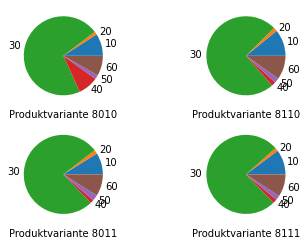

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_NoNan_ID_Zeiten.csv', sep=';')

#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2)


dfNew = df[df['Produktvariante'] == 8010].groupby(['Prozessschritt'])['Bearbeitungszeit_s'].mean()
ax = dfNew.plot.pie(ax=axes[0,0])
ax.set_xlabel('Produktvariante 8010')
ax.set_ylabel('')

dfNew = df[df['Produktvariante'] == 8011].groupby(['Prozessschritt'])['Bearbeitungszeit_s'].mean()
ax = dfNew.plot.pie(ax=axes[1,0])
ax.set_xlabel('Produktvariante 8011')
ax.set_ylabel('')

dfNew = df[df['Produktvariante'] == 8110].groupby(['Prozessschritt'])['Bearbeitungszeit_s'].mean()
ax = dfNew.plot.pie(ax=axes[0,1])
ax.set_xlabel('Produktvariante 8110')
ax.set_ylabel('')

dfNew = df[df['Produktvariante'] == 8111].groupby(['Prozessschritt'])['Bearbeitungszeit_s'].mean()
ax = dfNew.plot.pie(ax=axes[1,1])
ax.set_xlabel('Produktvariante 8111')
ax.set_ylabel('')

Produktvariante
8010    AxesSubplot(0.125,0.125;0.775x0.755)
8011    AxesSubplot(0.125,0.125;0.775x0.755)
8110    AxesSubplot(0.125,0.125;0.775x0.755)
8111    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Bearbeitungszeit_s, dtype: object

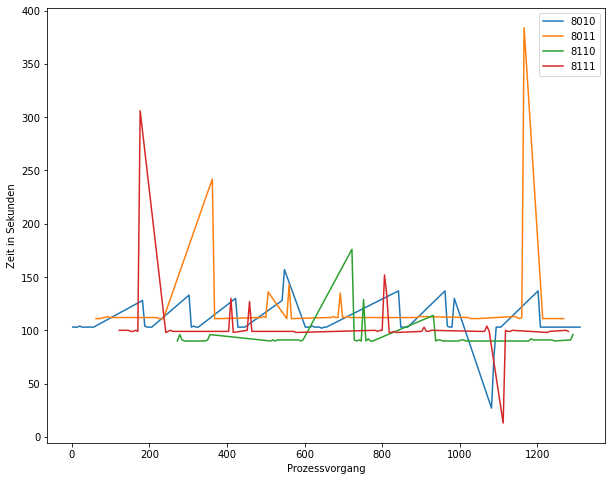

In [40]:
import pandas as pd

df = pd.read_csv('C:/Users/Workshop/Desktop/IoT-Workshop_Woche/ProdWID_final_Zeiten_10-25-15.csv', sep=';')

#Liniendiagramm (Zeitreihe) zum Aufzeigen der Schwankungen an AS 8, unterteilt nach Produktvarianten für die Zykluszeit

selectAS_PV = df[["Arbeitsstation", "Produktvariante", "Transportzeit_s", "Bearbeitungszeit_s"]]

selectAS_8 = selectAS_PV.loc[(df['Arbeitsstation'] == 8)]   #Filter vorselektierten Datensatz nach AS 8

selectPV_ZZ_AS8 = selectAS_8[["Produktvariante", "Bearbeitungszeit_s"]]

selectPV_ZZ_AS8.groupby('Produktvariante')['Bearbeitungszeit_s'].plot(xlabel = "Prozessvorgang",

                                                              ylabel = "Zeit in Sekunden",

                                                              legend=True,

                                                              figsize = (10, 8))

 